In [1]:
#Import libraries, Data Visualization using Plotly and Seaborn

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

In [2]:
co2_emission = pd.read_csv('CO2 Emissions Around the World/CO2_emission.csv')
co2_emission.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


'2019' and '2019.1' have the same values, because of that remove '2019.1' column from the dataset

In [3]:
co2_emission.drop(axis=1, columns='2019.1', inplace=True)

Is this dataset has duplicates?

In [4]:
co2_emission.duplicated().sum()

0

Information about dataset

In [5]:
co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    215 non-null    object 
 1   country_code    215 non-null    object 
 2   Region          215 non-null    object 
 3   Indicator Name  215 non-null    object 
 4   1990            185 non-null    float64
 5   1991            186 non-null    float64
 6   1992            189 non-null    float64
 7   1993            189 non-null    float64
 8   1994            189 non-null    float64
 9   1995            190 non-null    float64
 10  1996            190 non-null    float64
 11  1997            190 non-null    float64
 12  1998            189 non-null    float64
 13  1999            189 non-null    float64
 14  2000            190 non-null    float64
 15  2001            190 non-null    float64
 16  2002            191 non-null    float64
 17  2003            191 non-null    flo

In 2019 Top Five Countries with the Highest CO2 Emission

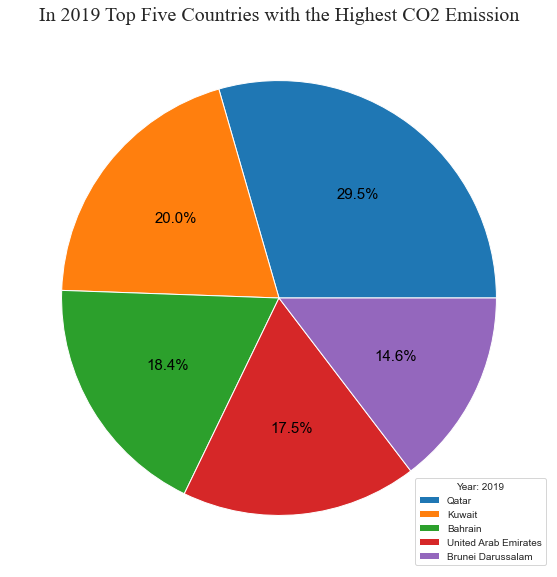

In [6]:
top_five_highest_emission = co2_emission.loc[:, ['Country Name', '2019']].sort_values(by='2019', ascending=False)[:5].set_index('Country Name')
plt.figure(figsize=(10, 10))
plt.pie(top_five_highest_emission['2019'],
        autopct="%1.1f%%",
        textprops={'color':'black', 'fontsize':15});
plt.legend(labels=top_five_highest_emission.index, title='Year: 2019', loc='lower right');
plt.title('In 2019 Top Five Countries with the Highest CO2 Emission', fontsize=20, fontfamily='Times New Roman');

In 1990 Top Five Countries with the Highest CO2 Emission

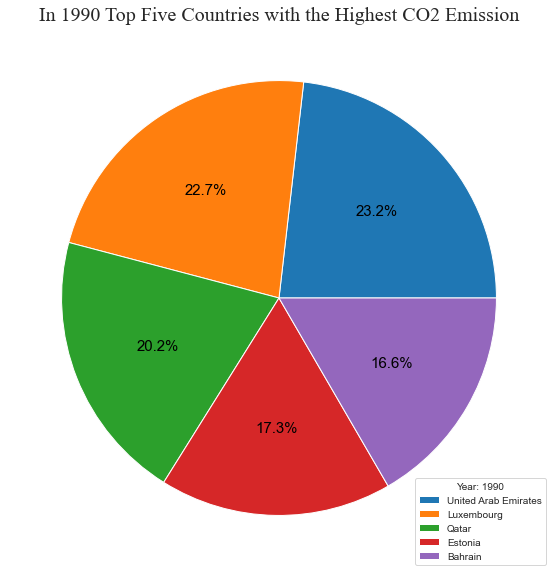

In [7]:
top_five_highest_emission = co2_emission.loc[:, ['Country Name', '1990']].sort_values(by='1990', ascending=False)[:5].set_index('Country Name')
plt.figure(figsize=(10, 10))
plt.pie(top_five_highest_emission['1990'],
        autopct="%1.1f%%",
        textprops={'color':'black', 'fontsize':15});
plt.legend(labels=top_five_highest_emission.index, title='Year: 1990', loc='lower right');
plt.title('In 1990 Top Five Countries with the Highest CO2 Emission', fontsize=20, fontfamily='Times New Roman');

Total CO2 Emission for Per Year (1990-2019)

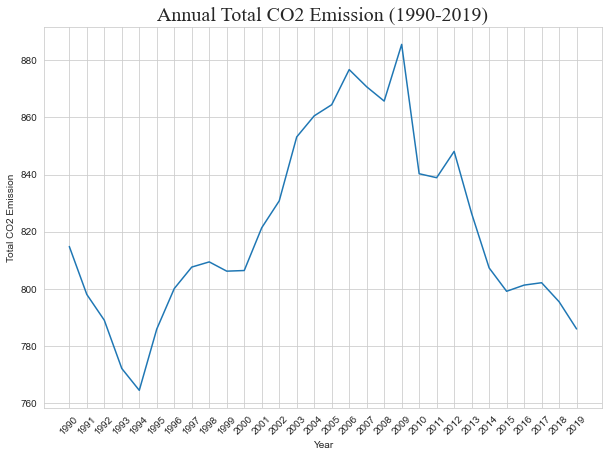

In [8]:
co2emission_for_lineplot = pd.DataFrame(co2_emission.loc[:, '1990':'2019'].sum(), columns=['Total CO2 Emission'])
co2emission_for_lineplot.reset_index(inplace=True)
co2emission_for_lineplot.rename(columns={'index':'Year'}, inplace=True)
plt.figure(figsize=(10, 7));
sns.lineplot(x='Year', y='Total CO2 Emission', data=co2emission_for_lineplot);
plt.xticks(rotation=45);
plt.title('Annual Total CO2 Emission (1990-2019)', fontsize=20, fontfamily='Times New Roman');

Mean CO2 Emissions in Different Rigions of earth(1990-2019)

In [9]:
columns = np.arange(1990, 2019).tolist()
columns_str = map(str, columns)
list_of_year = list(columns_str)
co2_region = co2_emission.groupby('Region')[list_of_year].mean()
co2_region.unstack()

      Region                    
1990  East Asia & Pacific            3.783577
      Europe & Central Asia          8.531603
      Latin America & Caribbean      2.238302
      Middle East & North Africa     7.585239
      North America                 17.278118
                                      ...    
2018  Latin America & Caribbean      3.011438
      Middle East & North Africa     8.631388
      North America                 15.436563
      South Asia                     1.297652
      Sub-Saharan Africa             0.924197
Length: 203, dtype: float64

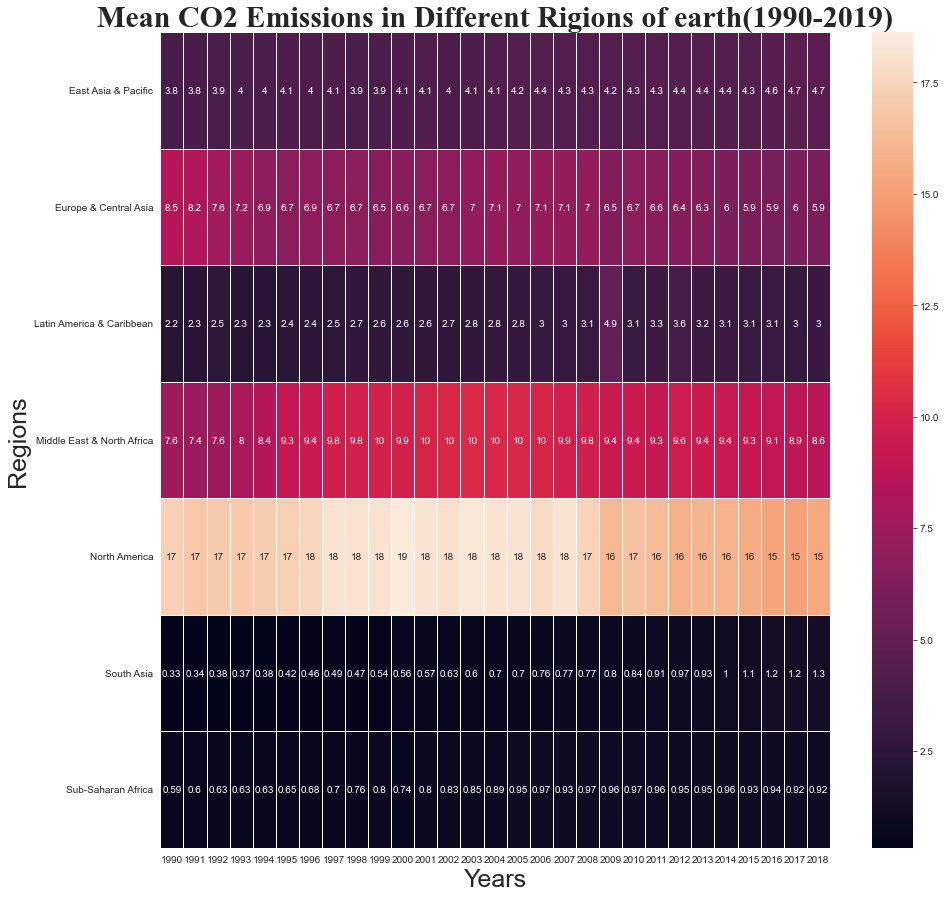

In [10]:
plt.figure(figsize=(15, 15));
plt.rcParams['font.size'] = 10;
plt.title('Mean CO2 Emissions in Different Rigions of earth(1990-2019)',
          fontweight='bold',
          fontdict={'fontsize': 30},
          fontfamily='Times New Roman');
sns.heatmap(co2_region, linecolor='white', linewidths=1, annot=True);
plt.xlabel('Years', fontdict={'fontsize': 25});
plt.ylabel('Regions', fontdict={'fontsize': 25});

CO2 Emission(metric tons per capita) Around the world in 2010

In [17]:
fig = px.choropleth(
    co2_emission,
    locations='country_code',
    color='2010',
    hover_name='Country Name',
    hover_data=['2010'],
    title='CO2 Emission(metric tons per capita) Around the world in 2010',
    color_continuous_scale=px.colors.sequential.Burg
)

fig.update_geos(fitbounds='locations', visible=False)

In [18]:
fig = px.choropleth(
    co2_emission,
    locations='country_code',
    color='2019',
    hover_name='Country Name',
    hover_data=['2019'],
    title='CO2 Emission(metric tons per capita) Around the world in 2019',
    color_continuous_scale=px.colors.sequential.Burg
)

fig.update_geos(fitbounds='locations', visible=False)